In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
STOPWOTDS = set(stopwords.words('english'))

corpus = [
    "I love this product, it's amazing!",
    "This is the best experience I’ve had!",
    "I am so happy with my purchase!",
    "I would definitely recommend this to my friends.",
    "This is terrible, I regret buying it.",
    "I am very disappointed with the service.",
    "The quality is not what I expected.",
    "I will never buy from this brand again.",
    "It’s good but could be improved.",
    "I feel neutral about this item, not bad but not great."
]
labels = [1,1,1,1,0,0,0,0,0,0]


In [ ]:
def preprocess(text):
  text = text.lower()
  words = word_tokenize(text)
  words = [word for word in words if word.isalpha()]
  return words
preprocessed_corpus = [preprocess(text) for text in corpus]
print(preprocessed_corpus)

[['i', 'love', 'this', 'product', 'it', 'amazing'], ['this', 'is', 'the', 'best', 'experience', 'i', 've', 'had'], ['i', 'am', 'so', 'happy', 'with', 'my', 'purchase'], ['i', 'would', 'definitely', 'recommend', 'this', 'to', 'my', 'friends'], ['this', 'is', 'terrible', 'i', 'regret', 'buying', 'it'], ['i', 'am', 'very', 'disappointed', 'with', 'the', 'service'], ['the', 'quality', 'is', 'not', 'what', 'i', 'expected'], ['i', 'will', 'never', 'buy', 'from', 'this', 'brand', 'again'], ['it', 's', 'good', 'but', 'could', 'be', 'improved'], ['i', 'feel', 'neutral', 'about', 'this', 'item', 'not', 'bad', 'but', 'not', 'great']]


In [ ]:
all_tokens = [token for doc in preprocessed_corpus for token in doc]
word_freq = Counter(all_tokens)
print(word_freq)

Counter({'i': 9, 'this': 6, 'it': 3, 'is': 3, 'the': 3, 'not': 3, 'am': 2, 'with': 2, 'my': 2, 'but': 2, 'love': 1, 'product': 1, 'amazing': 1, 'best': 1, 'experience': 1, 've': 1, 'had': 1, 'so': 1, 'happy': 1, 'purchase': 1, 'would': 1, 'definitely': 1, 'recommend': 1, 'to': 1, 'friends': 1, 'terrible': 1, 'regret': 1, 'buying': 1, 'very': 1, 'disappointed': 1, 'service': 1, 'quality': 1, 'what': 1, 'expected': 1, 'will': 1, 'never': 1, 'buy': 1, 'from': 1, 'brand': 1, 'again': 1, 's': 1, 'good': 1, 'could': 1, 'be': 1, 'improved': 1, 'feel': 1, 'neutral': 1, 'about': 1, 'item': 1, 'bad': 1, 'great': 1})


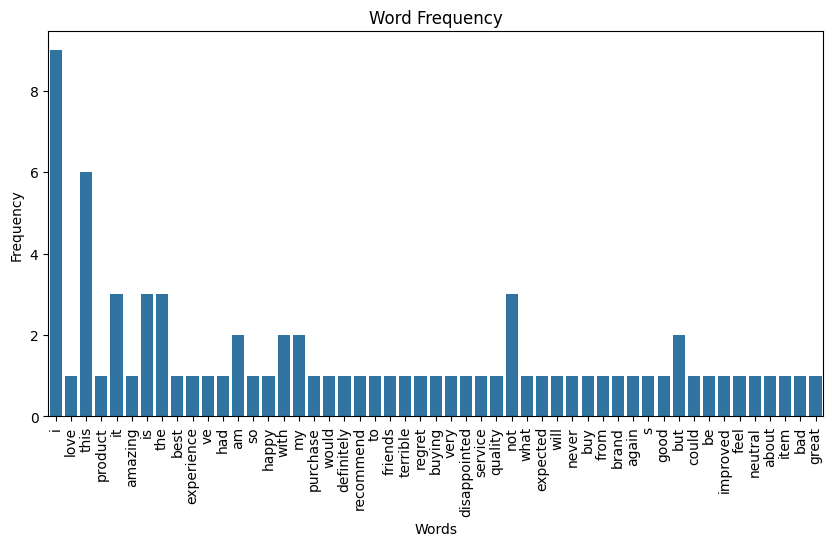

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(word_freq.keys()), y=list(word_freq.values()))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=90)
plt.show()

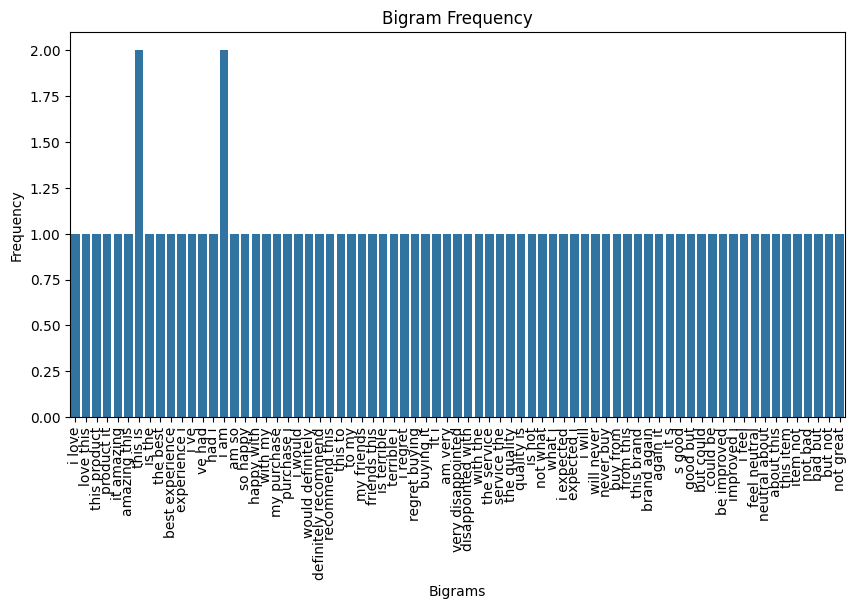

In [ ]:
bigrams = list(ngrams(all_tokens, 2))
bigram_freq = Counter(bigrams)
# print(bigram_freq)

bigram_labels = [' '.join(bigram) for bigram in bigram_freq.keys()]

# Plot the bigram frequencies
plt.figure(figsize=(10,5))
sns.barplot(x=bigram_labels, y=list(bigram_freq.values()))
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Bigram Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import requests
import zipfile
import os


# Step 1: Download the GloVe file
url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"

# Download the file
print("Downloading GloVe embeddings ... ")
response = requests.get(url)
with open(glove_zip_path, "wb") as f:
    f.write(response.content)
print("Download complete.")

# Step 2: Extract glove.6B.50d.txt
with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
    print("Extracting GloVe embeddings ... ")
    zip_ref.extract("glove.6B.50d.txt", ".")
print("Extraction complete.")

# Clean up by removing the zip file
os.remove(glove_zip_path)
print("Clean up complete. GloVe file ready to use.")


Download complete.
Extracting GloVe embeddings ... 
Extraction complete.
Clean up complete. GloVe file ready to use.


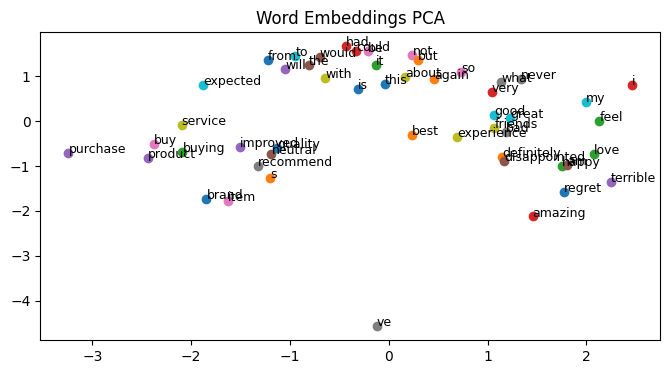

In [ ]:
# load glove embeddings
embedding_index = {}
with open("glove.6B.50d.txt", "r") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], "float32")
        embedding_index[word] = vector

# Get embeddings for words in corpus
embedding_dim = 50
corpus_vocab = list(set(all_tokens))
embedding_matrix = np.zeros((len(corpus_vocab), embedding_dim))

for i, word in enumerate(corpus_vocab):
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# PCA for 2D visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Plot embeddings
plt.figure(figsize=(8, 4))
for i, word in enumerate(corpus_vocab):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] , reduced_embeddings[i, 1], word, fontsize=9)
plt.title("Word Embeddings PCA")
plt.show()

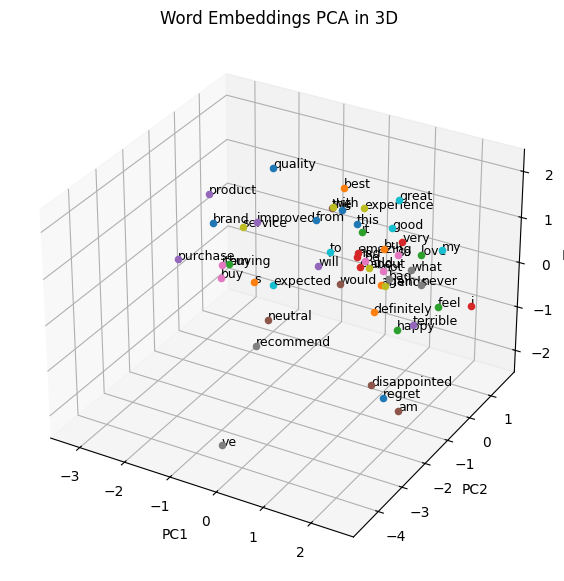

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA for 3D visualization
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Plot embeddings in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(corpus_vocab):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], marker='o')
    ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], word, fontsize=9)

ax.set_title("Word Embeddings PCA in 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [ ]:
# Bigram language model
bigram_model = {}

# Iterate through the bigrams
for w1, w2 in bigrams:
    if w1 not in bigram_model:
        bigram_model[w1] = Counter()
    bigram_model[w1][w2] += 1

# Normalize probabilities
for w1 in bigram_model:
    total_count = sum(bigram_model[w1].values())
    for w2 in bigram_model[w1]:
        bigram_model[w1][w2] /= total_count

# Example: Access probabilities for a specific word
word = "this"
if word in bigram_model:
    word_probs = bigram_model[word]
    print(f"Bigram probabilities for '{word}': {dict(word_probs)}")
else:
    print(f"'{word}' is not in the bigram model.")

Bigram probabilities for 'this': {'product': 0.16666666666666666, 'is': 0.3333333333333333, 'to': 0.16666666666666666, 'brand': 0.16666666666666666, 'item': 0.16666666666666666}


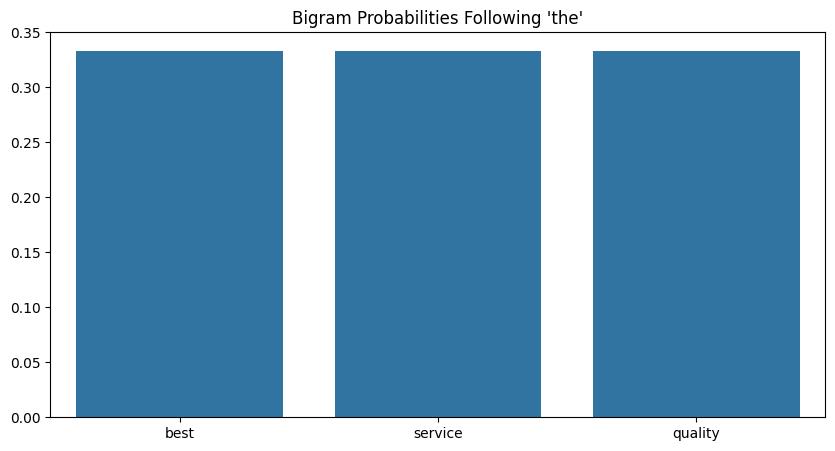

In [ ]:
# Visualize bigram probabilities for a specific word
word = "the"
if word in bigram_model:
  word_probs = bigram_model[word]
  plt.figure(figsize=(10, 5))
  sns.barplot(x=list(word_probs.keys()), y=list(word_probs.values()))
  plt.title(f"Bigram Probabilities Following '{word}'")
  plt.show()
else:
  print(f"The word '{word}' is not found as a bigram key.")

In [ ]:
# Tokenization for LSTM model
vocab = {word: i+1 for i, word in enumerate(corpus_vocab)} # +1 for padding index
tokenized_texts = [[vocab[word] for word in doc if word in vocab] for doc in preprocessed_corpus]

# Pad sequences
max_len = max(len(seq) for seq in tokenized_texts)
X = np.array([seq + [0] * (max_len - len(seq)) for seq in tokenized_texts])
y = np.array(labels)

# Define LSTM model
class SentimentLSTM(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
    super(SentimentLSTM, self) .__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.embedding(x)
    lstm_out, _ = self.lstm(x)
    out = self.fc(lstm_out[:, -1, :]) # Predict based on final hidden state
    return out

# Model training
model = SentimentLSTM(
    vocab_size=len(vocab) + 1,  # Add 1 for padding index
    embedding_dim=50,  # Example embedding dimension
    hidden_dim=50,  # LSTM hidden size
    output_dim=2  # Number of output classes (e.g., positive and negative sentiment)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare data loader
class TextDataset(Dataset):
  def __init__(self, x, y):
    self.X = torch.LongTensor(X)
    self.y = torch.LongTensor(y)

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

train_loader = DataLoader(TextDataset(X, y), batch_size=2, shuffle=True)

# Training loop with visualization
for epoch in range(100):
  total_loss = 0
  for inputs, labels in train_loader:
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
  print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train_loader) :.4f}')

Epoch 1, Loss: 0.7030
Epoch 2, Loss: 0.6903
Epoch 3, Loss: 0.6803
Epoch 4, Loss: 0.6718
Epoch 5, Loss: 0.6636
Epoch 6, Loss: 0.6545
Epoch 7, Loss: 0.6440
Epoch 8, Loss: 0.6318
Epoch 9, Loss: 0.6176
Epoch 10, Loss: 0.6012
Epoch 11, Loss: 0.5826
Epoch 12, Loss: 0.5616
Epoch 13, Loss: 0.5381
Epoch 14, Loss: 0.5120
Epoch 15, Loss: 0.4834
Epoch 16, Loss: 0.4522
Epoch 17, Loss: 0.4186
Epoch 18, Loss: 0.3829
Epoch 19, Loss: 0.3456
Epoch 20, Loss: 0.3075
Epoch 21, Loss: 0.2695
Epoch 22, Loss: 0.2325
Epoch 23, Loss: 0.1976
Epoch 24, Loss: 0.1656
Epoch 25, Loss: 0.1371
Epoch 26, Loss: 0.1124
Epoch 27, Loss: 0.0916
Epoch 28, Loss: 0.0743
Epoch 29, Loss: 0.0603
Epoch 30, Loss: 0.0490
Epoch 31, Loss: 0.0400
Epoch 32, Loss: 0.0329
Epoch 33, Loss: 0.0273
Epoch 34, Loss: 0.0228
Epoch 35, Loss: 0.0193
Epoch 36, Loss: 0.0164
Epoch 37, Loss: 0.0141
Epoch 38, Loss: 0.0123
Epoch 39, Loss: 0.0107
Epoch 40, Loss: 0.0095
Epoch 41, Loss: 0.0084
Epoch 42, Loss: 0.0075
Epoch 43, Loss: 0.0068
Epoch 44, Loss: 0.00

In [ ]:
# Visualize LSTM prediction on a sample input
model.eval()
with torch.no_grad():
  sample_input = torch. LongTensor(X[:1]) # Take first sequence
  lstm_output = model(sample_input)
  _, predicted = torch.max(lstm_output, dim=1)
  print(f"Predicted sentiment: {predicted.item()} (1: Positive, 0: Negative)")

Predicted sentiment: 0 (1: Positive, 0: Negative)
